In [2]:
import numpy as np
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, array_to_latex
from math import sqrt, pi
from IPython.display import display, Math


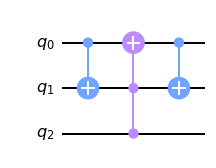

In [3]:
qc_cswap = QuantumCircuit(3)
qc_cswap.cx(0,1)
qc_cswap.ccx(2,1,0)
qc_cswap.cx(0,1)
qc_cswap.draw('mpl')

In [4]:
#CSWAP operation (order is inverted because of qiskit's system, the circuit gate is still the same)
qc_cswap = QuantumCircuit(3)
qc_cswap.cx(0,1)
qc_cswap.ccx(2,1,0)
qc_cswap.cx(0,1)
print(qc_cswap.draw('mpl'))
usim = Aer.get_backend('aer_simulator')
qc_cswap.save_unitary()
qobj = assemble(qc_cswap)
unitary = usim.run(qobj).result().get_unitary()
display(array_to_latex(unitary, prefix="\\text{Circuit = }\n"))

Figure(267.197x204.68)


<IPython.core.display.Latex object>

In [5]:
#The inner product is estimated by the probability of measuring 0 from the ancilla qubit. The probability of measuring 
#a 0 can be calculated to be (1 + (inner product)**2)/2 , therefore, by running the experiment a sufficiently large
#number of times, you can get the square of the inner product. Determining the sign should be possible by inspection,
#so you''ll have a value for the inner product with sign.

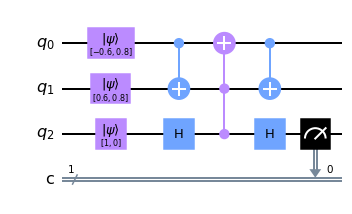

In [7]:
qc_qswap = QuantumCircuit(3,1)
qc_qswap.initialize([1,0], 2)
qc_qswap.initialize([3/5,4/5], 1)
qc_qswap.initialize([-3/5,4/5], 0)
qc_qswap.h(2)
qc_qswap.cx(0,1)
qc_qswap.ccx(2,1,0)
qc_qswap.cx(0,1)
qc_qswap.h(2)
qc_qswap.measure(2,0)
(qc_qswap.draw('mpl'))

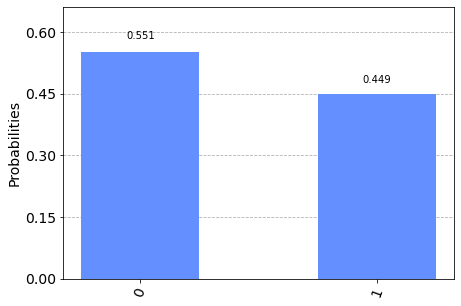

In [8]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_qswap).result()
counts = result.get_counts()
plot_histogram(counts)

{'0': 554, '1': 470}
{'0': 536, '1': 488}
{'0': 571, '1': 453}
{'1': 482, '0': 542}
{'1': 493, '0': 531}
{'0': 548, '1': 476}
{'1': 519, '0': 505}
{'0': 520, '1': 504}
{'0': 568, '1': 456}
{'0': 567, '1': 457}
{'1': 457, '0': 567}
{'1': 480, '0': 544}
{'1': 477, '0': 547}
{'0': 548, '1': 476}
{'1': 453, '0': 571}
{'0': 544, '1': 480}
{'0': 538, '1': 486}
{'0': 555, '1': 469}
{'0': 568, '1': 456}
{'1': 443, '0': 581}
{'0': 516, '1': 508}
{'0': 537, '1': 487}
{'0': 538, '1': 486}
{'0': 552, '1': 472}
{'1': 489, '0': 535}
{'1': 446, '0': 578}
{'0': 565, '1': 459}
{'1': 437, '0': 587}
{'0': 524, '1': 500}
{'1': 500, '0': 524}
{'0': 524, '1': 500}
{'1': 499, '0': 525}
{'0': 542, '1': 482}
{'0': 543, '1': 481}
{'0': 527, '1': 497}
{'0': 541, '1': 483}
{'0': 553, '1': 471}
{'1': 478, '0': 546}
{'0': 581, '1': 443}
{'0': 504, '1': 520}
{'0': 574, '1': 450}
{'0': 533, '1': 491}
{'1': 462, '0': 562}
{'1': 454, '0': 570}
{'1': 487, '0': 537}
{'1': 472, '0': 552}
{'0': 527, '1': 497}
{'1': 479, '0

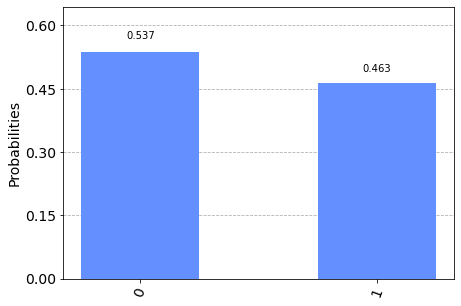

In [9]:
sim = Aer.get_backend('aer_simulator') 
tot_zero = 0
tot_one = 0
for i in range(100):
    result = sim.run(qc_qswap).result()
    counts = result.get_counts()
    print(counts)
    tot_zero+= counts['0']
    tot_one+= counts['1']
print(tot_zero,tot_one)
counts = {'0':tot_zero,'1':tot_one}
a = (tot_zero - tot_one)/(tot_zero + tot_one)
if a<0 : 
    a = 0
a = np.sqrt(a)
print("Inner product = ",a)
print(counts)
plot_histogram(counts)

In [10]:
#Measuring in the bell basis gives the inner product directly in terms of the probability of obtaining the state 
#(|00>+|11>)/sqrt(2), more accurately, the probability of getting that bell state is half of the square of the inner
#product. To measure in the bell basis, the following circuit can be applied.

In [11]:
qswap_bell = QuantumCircuit(2)
qswap_bell.initialize([1,0], 1)
qswap_bell.initialize([0,1], 0)
qswap_bell.cx(1,0)
qswap_bell.h(1)
qswap_bell.measure_all()
print(qswap_bell.draw())

        ┌─────────────────┐┌───┐      ░ ┌─┐   
   q_0: ┤ Initialize(0,1) ├┤ X ├──────░─┤M├───
        ├─────────────────┤└─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ Initialize(1,0) ├──■──┤ H ├─░──╫─┤M├
        └─────────────────┘     └───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════╩══╩═
                                         0  1 


In [13]:
total_counts = 0
total_counts_11 = 0
for i in range(100):    
    qsim = Aer.get_backend('aer_simulator') 
    result = qsim.run(qswap_bell).result()
    counts = result.get_counts()
    for i in counts:
        total_counts+= counts[i]
    total_counts_11+=counts['11']
a = ((1 - 2*(total_counts_11/total_counts)))
if a<0:
    a = 0
a = np.sqrt(a)
print(a)

0.015309310892395154


0.2097617696340304

0.24899799195977465